#LABSHEET 4
## Logistic Regression for Classification

NAME     : Abhinav Pandey

ROLL NO. : AM.EN.U4AIE21088

#PART A
## Prerequisites for Logistic Regression Implementation

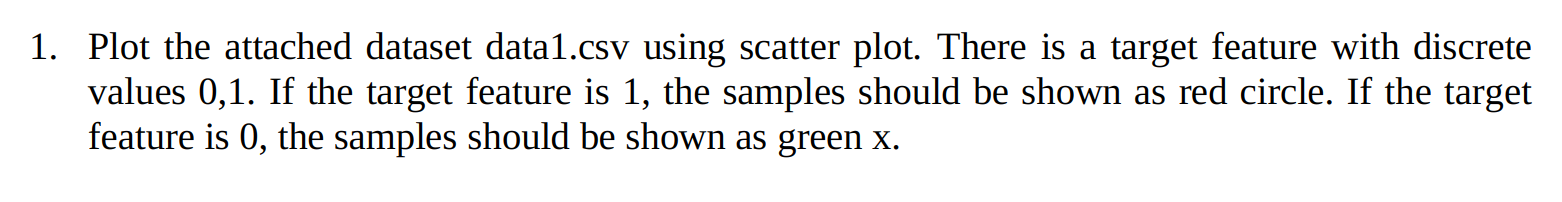

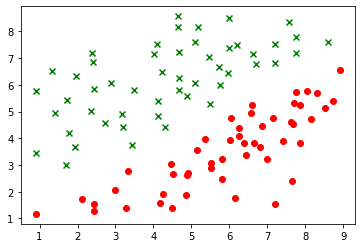

In [2]:
#1

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('data1.csv')
data1 = data[data['y']==0]
data2 = data[data['y']==1]

plt.scatter(data1['x1'], data1['x2'], color='green', marker='x')
plt.scatter(data2['x1'], data2['x2'], color='red', marker='o')
plt.show()

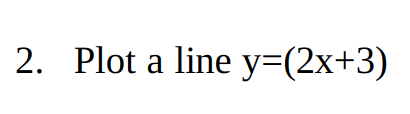

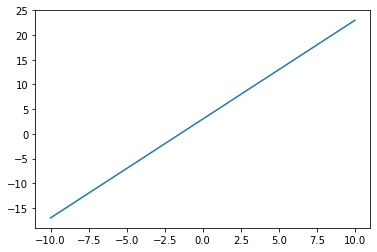

In [3]:
#2

x = np.linspace(-10, 10, 100)
y = 2*x + 3
plt.plot(x, y)
plt.show()

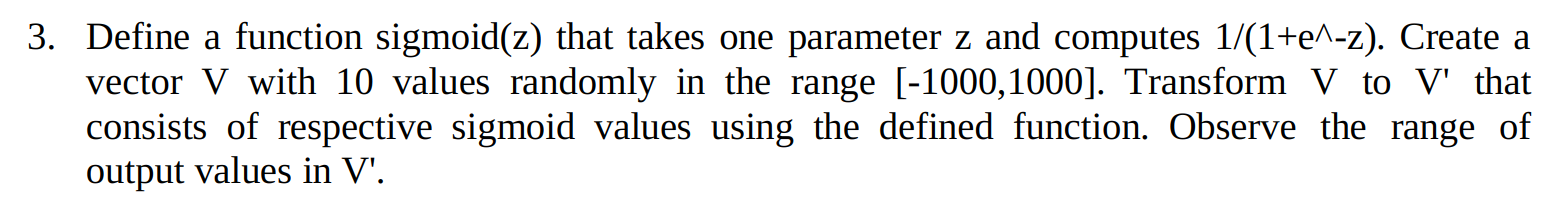

In [4]:
#3

def sigmoid(z):
    return 1/(1+np.exp(-z))

V = np.random.randint(-1000, 1000, 10)
print(V)
V_prime = sigmoid(V)

print(V_prime)

[ 760  651  769 -136  980  -82  214 -476  -59  303]
[1.00000000e+000 1.00000000e+000 1.00000000e+000 8.62880116e-060
 1.00000000e+000 2.44260074e-036 1.00000000e+000 1.88723775e-207
 2.38026641e-026 1.00000000e+000]


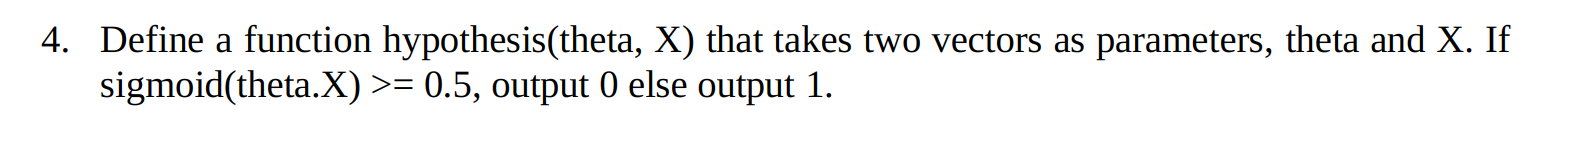

In [ ]:
#4

def hypothesis(theta, X):
  if sigmoid(np.dot(theta, X))>=0.5:
    return 0
  else:
    return 1

theta = 2
X = data['x1']

print(hypothesis(theta, X))


0

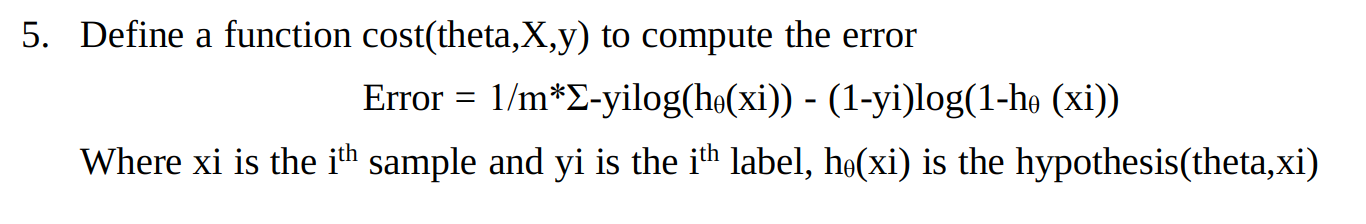

In [5]:
#5

def cost(theta, X, y):
    m = len(y)
    h = sigmoid(theta*X)
    error = -y*np.log(h) - (1-y)*np.log(1-h)
    return 1/m * sum(error)

theta = np.array([1, 2, 3])
X = np.array([1, 2, 3])
y = np.array([1, 0, 1])
print(cost(theta, X, y))

1.443845005875252


#PART B
## Implementation of logistic regression

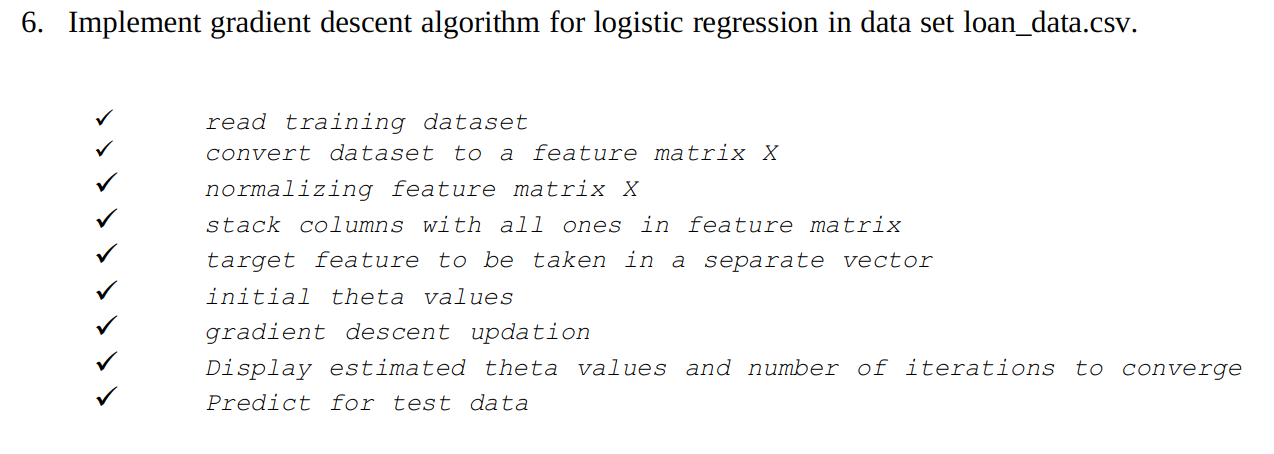

In [23]:
import time, psutil, os, math
from tqdm.contrib import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split

In [24]:
start = time.time()
process = psutil.Process(os.getpid())

In [25]:
data = pd.read_csv('loan_data.csv')
print(pd.Series({"Memory usage": "{:.4f} MB".format(data.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data.shape)}).to_string())
data.head()

Memory usage     0.0610 MB
Dataset shape    (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
def logistic(x):
    y = 1 / (1 + np.exp(-x))
    return y
x, x_arr = 0, np.array([-5, -1, 1, 5])
print(f"logistic({x}) = {logistic(x)}")
print(f"logistic({x_arr}) = {logistic(x_arr)}")

logistic(0) = 0.5
logistic([-5 -1  1  5]) = [0.00669285 0.26894142 0.73105858 0.99330715]


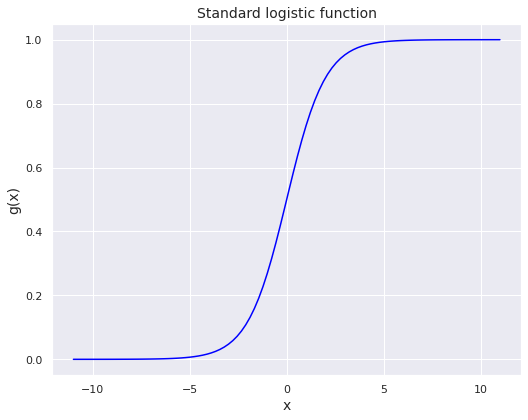

In [27]:
plt.figure(figsize = (7.5, 6))
x = np.linspace(-11, 11, 100)
plt.plot(x, logistic(x), color = 'blue')
plt.xlabel("x", fontsize = 14)
plt.ylabel("g(x)", fontsize = 14)
plt.title("Standard logistic function", fontsize = 14)
plt.tight_layout()
plt.show()

In [28]:
def log_loss(y, y_dash):
    loss = - (y * np.log(y_dash)) - ((1 - y) * np.log(1 - y_dash))
    return loss
y, y_dash = 0, 0.6
print(f"log_loss({y}, {y_dash}) = {log_loss(y, y_dash)}")

log_loss(0, 0.6) = 0.916290731874155


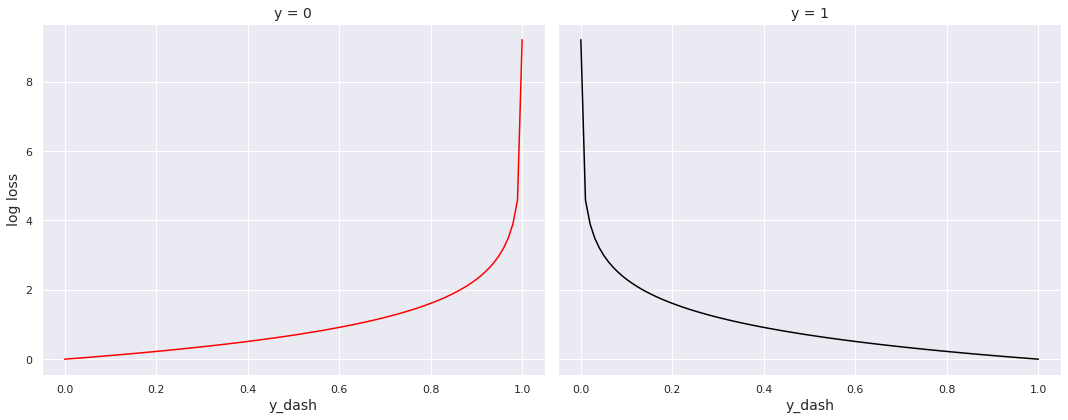

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
y_dash = np.linspace(0.0001, 0.9999, 100)
ax[0].plot(y_dash, log_loss(0, y_dash), color = 'red')
ax[0].set_title("y = 0", fontsize = 14)
ax[0].set_xlabel("y_dash", fontsize = 14)
ax[0].set_ylabel("log loss", fontsize = 14)
ax[1].plot(y_dash, log_loss(1, y_dash), color = 'black')
ax[1].set_title("y = 1", fontsize = 14)
ax[1].set_xlabel("y_dash", fontsize = 14)
plt.tight_layout()
plt.show()

In [30]:
def cost_func(y, y_dash):
    assert len(y) == len(y_dash), "Length of true values and length of predicted values do not match"
    m = len(y)
    cost = 0
    for i in range(m):
        cost += log_loss(y[i], y_dash[i])
    cost = cost / m
    return cost

y, y_dash = np.array([0, 1, 0]), np.array([0.4, 0.6, 0.25])
print(f"cost_func({y}, {y_dash}) = {cost_func(y, y_dash)}")

cost_func([0 1 0], [0.4  0.6  0.25]) = 0.43644443999458743


In [31]:
def cost_func_vec(y, y_dash):
    assert len(y) == len(y_dash), "Length of true values and length of predicted values do not match"
    m = len(y)
    loss_vec = np.array([log_loss(y[i], y_dash[i]) for i in range(m)])
    cost = np.dot(loss_vec, np.ones(m)) / m
    return cost

y, y_dash = np.array([0, 1, 0]), np.array([0.4, 0.6, 0.25])
print(f"cost_func_vec({y}, {y_dash}) = {cost_func(y, y_dash)}")

cost_func_vec([0 1 0], [0.4  0.6  0.25]) = 0.43644443999458743


In [32]:
def cost_logreg(X, y, w, b):
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    z = []
    for i in range(m):
        s = 0
        for j in range(n):
            s += X[i, j] * w[j]
        z.append(s + b)
    z = np.array(z)
    y_dash = logistic(z)
    cost = cost_func(y, y_dash)
    return cost

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost_logreg(X = {X}, y = {y}, w = {w}, b = {b}) = {cost_logreg(X, y, w, b)}")

cost_logreg(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350784906


In [33]:
def cost_logreg_vec(X, y, w, b):
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    z = np.matmul(X, w) + (b * np.ones(m))
    y_dash = logistic(z)
    cost = cost_func_vec(y, y_dash)
    return cost

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost_logreg_vec(X = {X}, y = {y}, w = {w}, b = {b}) = {cost_logreg(X, y, w, b)}")

cost_logreg_vec(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350784906


In [34]:
def grad_logreg_vec(X, y, w, b): 
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    y_dash = logistic(np.matmul(X, w) + b * np.ones(m))
    grad_w = np.matmul(y_dash - y, X) / m
    grad_b = np.dot(y_dash - y, np.ones(m)) / m
    return grad_w, grad_b

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"grad_logreg_vec(X = {X}, y = {y}, w = {w}, b = {b}) = {grad_logreg_vec(X, y, w, b)}")

grad_logreg_vec(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = (array([-4.99991649,  4.99991649]), 0.4999916492890759)


In [37]:
def grad_desc(X, y, w, b, alpha, n_iter, show_cost = True, show_params = False): 
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    cost_history, params_history = [], []
    for i, j in itertools.product(range(n_iter), range(1)):
        grad_w, grad_b = grad_logreg_vec(X, y, w, b)   
        w += - alpha * grad_w
        b += - alpha * grad_b
        cost =  cost_logreg_vec(X, y, w, b)
        cost_history.append(cost)
        params_history.append([w, b])
        if show_cost == True and show_params == False and (i % math.ceil(n_iter / 10) == 0 or i == n_iter - 1):
            print(f"Iteration {i:6}:    Cost  {float(cost_history[i]):3.4f}")
        if show_cost == True and show_params == True and (i % math.ceil(n_iter / 10) == 0 or i == n_iter - 1):
            print(f"Iteration {i:6}:    Cost  {float(cost_history[i]):3.4f},   Params  {params_history[i]}")
        return w, b, cost_history, params_history

X, y, w, b, alpha, n_iter = np.array([[0.1, 0.2], [-0.1, 0.1]]), np.array([1, 0]), np.array([0., 0.]), 0., 0.1, 100000
w_out, b_out, cost_history, params_history = grad_desc(X, y, w, b, alpha, n_iter, show_cost = True, show_params = True)

  0%|          | 0/100000 [00:00<?, ?it/s]

Iteration      0:    Cost  0.6928,   Params  [array([0.005 , 0.0025]), 0.0]


In [36]:
data.drop(['ApplicantIncome', 'CoapplicantIncome'], axis = 1, inplace = True)
data.replace(to_replace = -999, value = np.nan, inplace = True)
label_dict = {'b': 0, 's': 1}
data.replace({'Label': label_dict}, inplace = True)

In [38]:
data_train, data_test = train_test_split(data, test_size = 0.2, random_state = 40)

In [39]:
(data.isna().sum()[data.isna().sum() > 0] / len(data)).sort_values(ascending = False)

Credit_History      0.081433
Self_Employed       0.052117
LoanAmount          0.035831
Dependents          0.024430
Loan_Amount_Term    0.022801
Gender              0.021173
Married             0.004886
dtype: float64

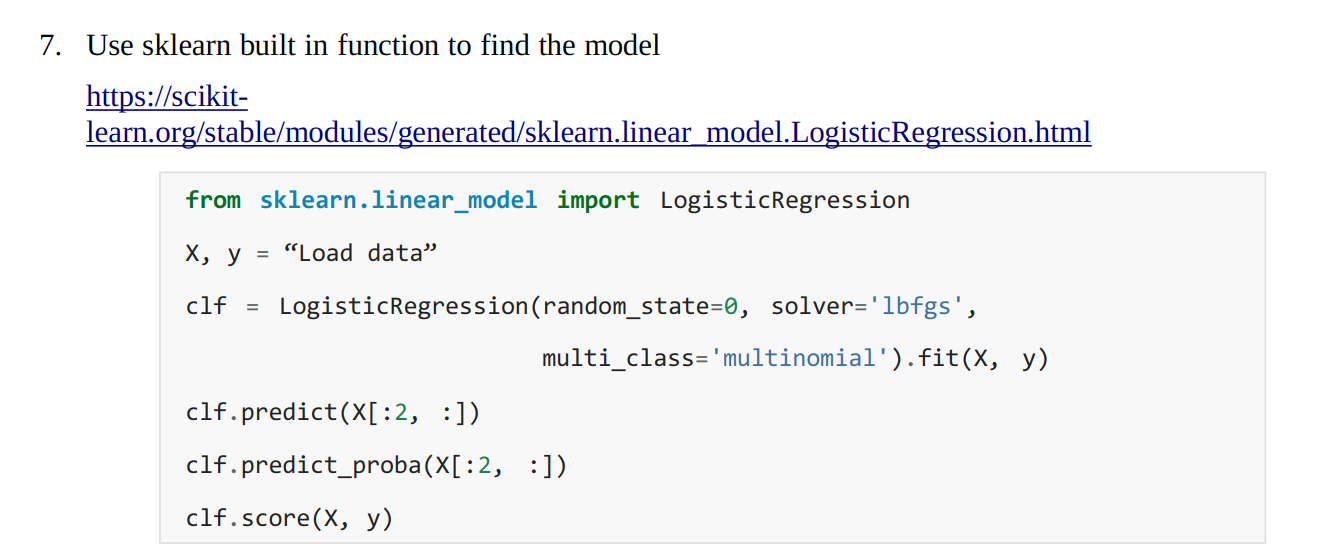

In [ ]:
#7 

from sklearn.linear_model import LogisticRegression
x,y='loan_data.csv'
clf=LogisticRegression(random_state=0,solver='lbfs',multi_class='multinomial').fit(x,y)
clf.predict(x[:2,:])
clf.predict_proba(x[:2,:])
clf.score(x,y)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
# Making predictions
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")


# PART C
## Performance Evaluation of the classifier

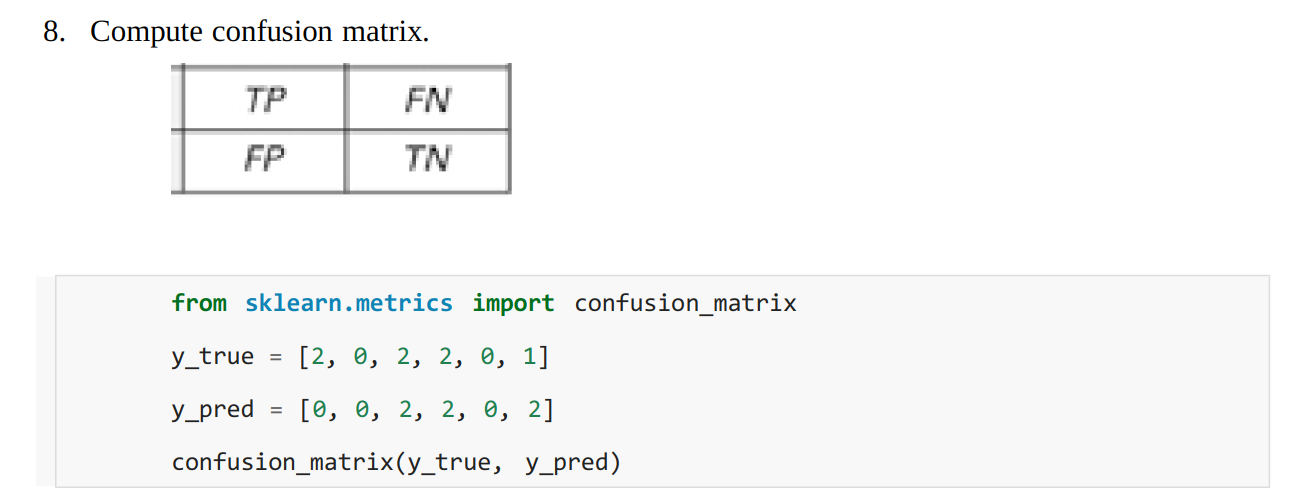

In [14]:
#8

#compute the confusion matrix
from sklearn.metrics import confusion_matrix
y_true=[2,0,2,2,0,1]
y_pred=[0,0,2,2,0,2]
confusion_matrix(y_true,y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

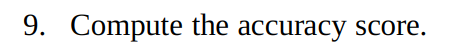

In [15]:
#9

#compute the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.6666666666666666

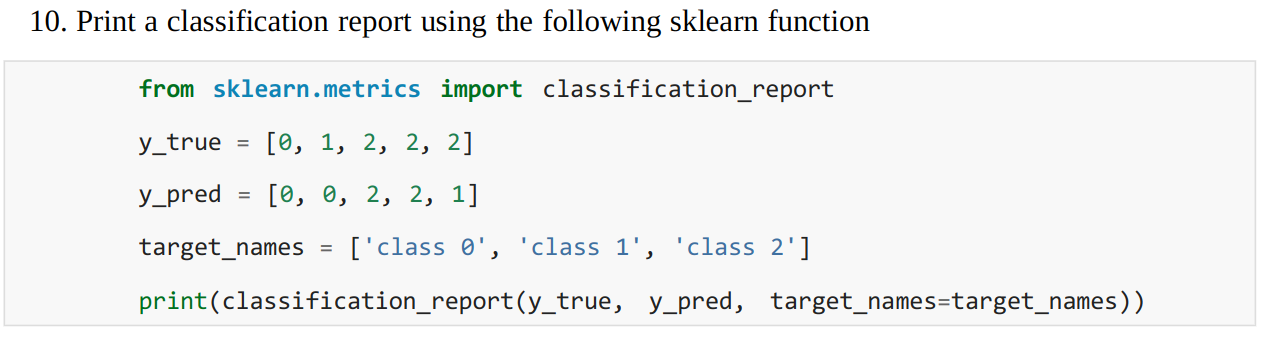

In [16]:
#10

from sklearn.metrics import classification_report
y_true=[0,1,2,2,2]
y_pred=[0,0,2,2,1]
target_names=['class0','class1','class2']
print(classification_report(y_true,y_pred,target_names=target_names))

              precision    recall  f1-score   support

      class0       0.50      1.00      0.67         1
      class1       0.00      0.00      0.00         1
      class2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



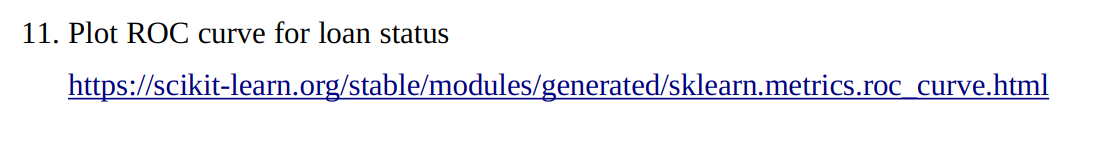
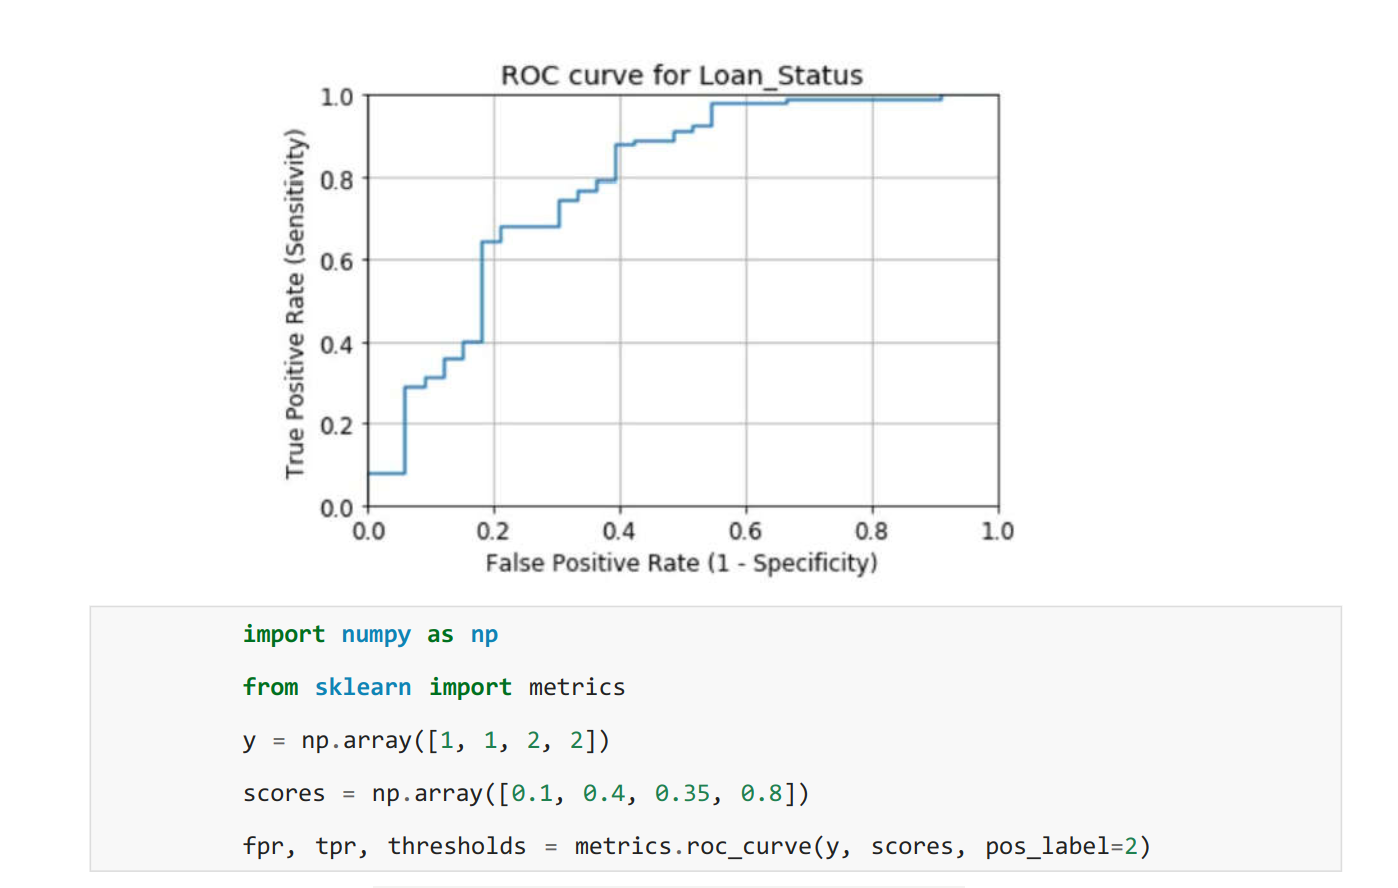

[0.  0.  0.5 0.5 1. ]
[0.  0.5 0.5 1.  1. ]
[1.8  0.8  0.4  0.35 0.1 ]


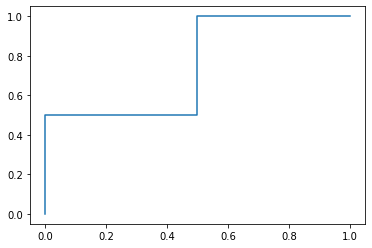

In [18]:
#11

import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
y=np.array([1,1,2,2])
scores=np.array([0.1,0.4,0.35,0.8])
fpr,tpr,thresholds=metrics.roc_curve(y,scores,pos_label=2)
print(fpr)
print(tpr)
print(thresholds)
plt.plot(fpr,tpr)
plt.show()


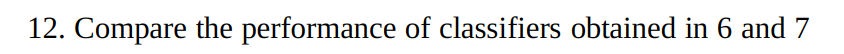

In [ ]:
#compare the performance of classifiers obtained in gradient descent and sklearn



# PART D
## EXTRA CREDIT

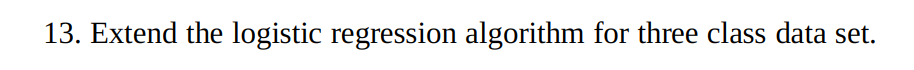